In [147]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

import plotly.express as px
import plotly
import plotly.graph_objects as go

from sklearn.decomposition import PCA


In [148]:
transactions = pd.read_csv('../data/acct_transactions.csv', delimiter = ',', index_col=0)
transactions

tran_amt  principal_amt  interest_amt  new_balance
0      0.024780       0.027362     -0.172302     1.473768
1      0.024780       0.027362     -0.172302    -0.146869
2     -0.287262      -0.286364     -0.172302     1.504441
3      0.024300       0.026880     -0.172302    -0.160969
4      0.024780       0.027362     -0.172302    -0.153326
...         ...            ...           ...          ...
77575 -0.281313      -0.280383     -0.172302    -0.220415
77576 -0.275524      -0.274563     -0.172302     0.117090
77577 -0.008321      -0.005917     -0.172302    -0.259948
77578 -1.330588      -1.335319     -0.172302    -0.189580
77579  0.024780       0.027362     -0.172302    -1.386092

[77580 rows x 4 columns]

In [149]:
# define k-means
# kmeans first

def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

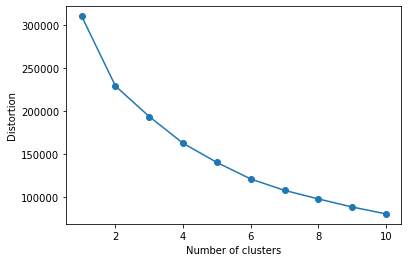

In [150]:
plot_distortion(transactions)
# looks like 5 is the winner

In [151]:
# set up k_means params
km = KMeans(n_clusters=2,
            n_init=10,
            random_state=0)

In [152]:
# fit and predict
y_km = km.fit_predict(transactions)
y_km

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [153]:
transactions['cluster'] = y_km
transactions

tran_amt  principal_amt  interest_amt  new_balance  cluster
0      0.024780       0.027362     -0.172302     1.473768        0
1      0.024780       0.027362     -0.172302    -0.146869        0
2     -0.287262      -0.286364     -0.172302     1.504441        0
3      0.024300       0.026880     -0.172302    -0.160969        0
4      0.024780       0.027362     -0.172302    -0.153326        0
...         ...            ...           ...          ...      ...
77575 -0.281313      -0.280383     -0.172302    -0.220415        0
77576 -0.275524      -0.274563     -0.172302     0.117090        0
77577 -0.008321      -0.005917     -0.172302    -0.259948        0
77578 -1.330588      -1.335319     -0.172302    -0.189580        0
77579  0.024780       0.027362     -0.172302    -1.386092        0

[77580 rows x 5 columns]

In [154]:
radar_scaled = transactions.groupby('cluster').mean()
radar_scaled


tran_amt  principal_amt  interest_amt  new_balance
cluster                                                    
0       -0.126986      -0.126123     -0.108926     0.000891
1        3.035634       3.014996      2.603905    -0.021294

In [155]:
def plotRadarChart(data,title):
    temp_list = []
    for i in range(len(data)):
        temp_list.append(go.Scatterpolar(
                                        r=data.iloc[i,:4].values,
                                        theta=data.columns[:4],
                                        name=str(data.index[i]),
                                        # fill='toself'
        ))

    layout = go.Layout(polar = dict(radialaxis = dict(visible = True)),
                        showlegend = True, title=title)     
    fig = go.Figure(data = temp_list, layout = layout)     
    fig.show()

In [156]:
plotRadarChart(radar_scaled, "Transaction segments")

In [157]:
def pcScatter2D(data,n, title):
    # Set up clustering
    km = KMeans(n_clusters=n,
        n_init=10,
        random_state=0)

    # fit & predict the clusters
    y_km = km.fit_predict(data.drop('cluster', axis=1))
    y_km
    print(data)
    # PCA to 2D
    pca = PCA(n_components=2)
    pca_fit = pca.fit(data.drop('cluster', axis=1))
    pca_fit

    # Column Titles
    pc_columns = []
    for component in range(2):
        pc_columns.append('PC' + str(component+1))

    #make PC dataframe
    principal_components = pd.DataFrame(pca.fit_transform(data), 
                                    columns=pc_columns)

    # append k-means cluster to PC dataframe
    principal_components['cluster'] = y_km

    # plot the 2D scatter
    scatterPlot(principal_components, title)

In [158]:
def scatterPlot(data,title):
    fig = px.scatter(data, x="PC1", y="PC2", color='cluster',title=title + str(n))
    fig.show()

In [159]:
n=2
pcScatter2D(transactions,n,'2D Transaction clusters')

       tran_amt  principal_amt  interest_amt  new_balance  cluster
0      0.024780       0.027362     -0.172302     1.473768        0
1      0.024780       0.027362     -0.172302    -0.146869        0
2     -0.287262      -0.286364     -0.172302     1.504441        0
3      0.024300       0.026880     -0.172302    -0.160969        0
4      0.024780       0.027362     -0.172302    -0.153326        0
...         ...            ...           ...          ...      ...
77575 -0.281313      -0.280383     -0.172302    -0.220415        0
77576 -0.275524      -0.274563     -0.172302     0.117090        0
77577 -0.008321      -0.005917     -0.172302    -0.259948        0
77578 -1.330588      -1.335319     -0.172302    -0.189580        0
77579  0.024780       0.027362     -0.172302    -1.386092        0

[77580 rows x 5 columns]
